<a href="https://colab.research.google.com/github/thehyperpineapple/FaceDetection/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inital Setup and Data Collection

### - Installing required libraries

In [ ]:
# !pip install labelme tensorflow-gpu opencv-python matplotlib albumentations

### - Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### - Check dataset and make image loading function


In [29]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt
import os

In [ ]:
images = tf.data.Dataset.list_files("/content/drive/MyDrive/Project AIML/images/*.jpg", shuffle=True)
# Creating a dataset with our input data, in this case being our .jpg files that we've collected
# Shuffle is enabled to help randomise

In [ ]:
images.as_numpy_iterator().next()
#returns full file path

b'/content/drive/MyDrive/Project AIML/images/Vanya (2).jpg'

In [ ]:
def load_image(path):
  image_byte = tf.io.read_file(path) #returns as byte data
  img = tf.io.decode_jpeg(image_byte) #returns image
  return img 

In [ ]:
images = images.map(load_image)

In [ ]:
images.as_numpy_iterator().next()

array([[[128, 128, 120],
        [128, 128, 120],
        [134, 134, 126],
        ...,
        [204, 204, 202],
        [204, 204, 202],
        [203, 203, 201]],

       [[125, 125, 117],
        [125, 125, 117],
        [133, 133, 125],
        ...,
        [205, 205, 203],
        [205, 205, 203],
        [204, 204, 202]],

       [[151, 151, 143],
        [135, 135, 127],
        [116, 116, 108],
        ...,
        [205, 205, 203],
        [205, 205, 203],
        [205, 205, 203]],

       ...,

       [[194, 194, 192],
        [195, 195, 193],
        [196, 196, 194],
        ...,
        [185, 195, 194],
        [187, 197, 196],
        [190, 200, 199]],

       [[196, 196, 194],
        [195, 195, 193],
        [194, 194, 192],
        ...,
        [187, 197, 196],
        [187, 197, 196],
        [187, 197, 196]],

       [[196, 196, 194],
        [194, 194, 192],
        [192, 192, 190],
        ...,
        [190, 200, 199],
        [186, 196, 195],
        [183, 193, 192]]

#### - Viewing Raw Images

In [ ]:
image_gen = images.batch(4).as_numpy_iterator()
# the batch() function is used to return multiple images rather than just 1
# Here we are visualising 4

In [ ]:
plot_img = image_gen.next()

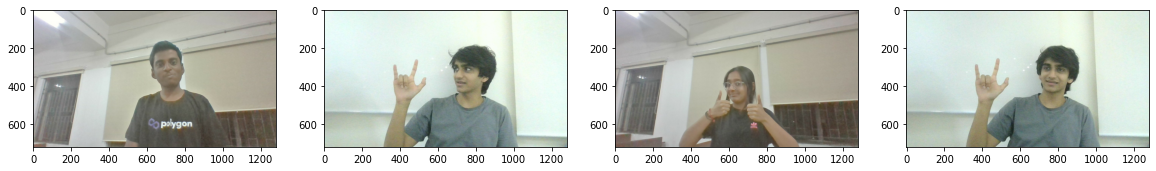

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Creates figure and a set of 4 subplots with size 20x20 inches
for idx, image in enumerate(plot_img):
  ax[idx].imshow(image)
plt.show()

#### - Data Augumentation

In [5]:
import albumentations as alb
import cv2

In [37]:
# Setting various augumentations

augmentation = alb.Compose([
                          alb.RandomCrop(width=450, height=450),
                          alb.HorizontalFlip(p=0.5),
                          alb.RandomBrightnessContrast(p=0.2),
                          alb.RandomGamma(p=0.2),
                          alb.RGBShift(p=0.2),
                          alb.VerticalFlip(p=0.5)], 
                          bbox_params=alb.BboxParams(format='albumentations',
                                                    label_fields=['class_labels']))

##### - Load a test image and annotation with OpenCV and JSON

In [64]:
img = cv2.imread(os.path.join('drive','MyDrive','Project AIML','train','images','Tarran (1).jpg'))
img.shape

(720, 1280, 3)

In [65]:
with open(os.path.join('drive','MyDrive','Project AIML','train','labels','Tarran (1).json'), 'r') as f:
        label = json.load(f)

In [68]:
label['shapes'][0]['points']

[[623.3333333333334, 160.0], [937.9674796747968, 504.7154471544715]]

In [69]:
coordinates = [0,0,0,0]
coordinates[0] = label['shapes'][0]['points'][0][0] # x-min
coordinates[1] = label['shapes'][0]['points'][0][1] # y-min
coordinates[2] = label['shapes'][0]['points'][1][0] # x-max
coordinates[3] = label['shapes'][0]['points'][1][1] # y-max
coordinates

[623.3333333333334, 160.0, 937.9674796747968, 504.7154471544715]

In [70]:
if img.shape == (720,1280,3): # height, width
  coordinates = list(np.divide(coordinates, [1080,720,1080,720])) # width,height,width,height
elif img.shape == (3072, 4080, 3):
  coordinates = list(np.divide(coordinates, [4080,3072,4080,3072])) # width,height,width,height

coordinates

[0.5771604938271605,
 0.2222222222222222,
 0.8684884071062933,
 0.7009936766034327]

In [71]:
augmented_image = augmentation(image = img, bboxes=[coordinates], class_labels=['Tarran'])

In [72]:
augmented_image['class_labels']

['Tarran']

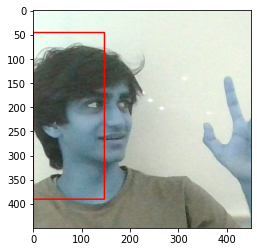

In [73]:
cv2.rectangle(augmented_image['image'], 
              tuple(np.multiply(augmented_image['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented_image['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented_image['image'])